**Подготовка датафрейма**

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
import pandas as pd
import re

In [ ]:
# Данные о баллах на региональном этапе олимпиады.
region_dataframe = pd.read_csv("Region_dataframe.csv", encoding = "windows-1251", sep = ';') 
region_dataframe = region_dataframe.fillna('-')
region_dataframe

,Фамилия,Имя,Класс,Регион,Балл
0,Челышкова Алина,-,9,Адыгея,"27,8"
1,Долева Алина,-,9,Адыгея,"8,5"
2,Порубова Александра,-,9,Адыгея,"5,7"
3,Яшникова София,-,9,Адыгея,"5,1"
4,Вартазарян Эрик,-,9,Адыгея,"4,5"
...,...,...,...,...,...
11516,Таганов Д.А.,-,11,Ярославская область,"4,9"
11517,Агаева А.А.,-,11,Ярославская область,4
11518,Одинцова А.Ю.,-,11,Ярославская область,4
11519,Наумова К.А.,-,11,Ярославская область,"2,7"


In [ ]:
region_dataframe=region_dataframe.assign(status = 'не прошел')

In [ ]:
region_dataframe

,Фамилия,Имя,Класс,Регион,Балл,status
0,Челышкова Алина,-,9,Адыгея,"27,8",не прошел
1,Долева Алина,-,9,Адыгея,"8,5",не прошел
2,Порубова Александра,-,9,Адыгея,"5,7",не прошел
3,Яшникова София,-,9,Адыгея,"5,1",не прошел
4,Вартазарян Эрик,-,9,Адыгея,"4,5",не прошел
...,...,...,...,...,...,...
11516,Таганов Д.А.,-,11,Ярославская область,"4,9",не прошел
11517,Агаева А.А.,-,11,Ярославская область,4,не прошел
11518,Одинцова А.Ю.,-,11,Ярославская область,4,не прошел
11519,Наумова К.А.,-,11,Ярославская область,"2,7",не прошел


In [ ]:
# Данные о призерстве на заключительном этапе
country_dataframe = pd.read_csv("Country_dataframe.csv", encoding = "windows-1251", sep = ';') 
country_dataframe

,ФИО,Имя,Класс,Регион,Балл,Статус
0,Хоретоненко Елизавета Павловна,NaN,9,Москва,"82,8",Призер
1,Головин Матвей Олегович,NaN,9,Москва,"80,4",Призер
2,Овечкина Анна Артемовна,NaN,9,Вологодская область,"78,8",Призер
3,Антонова Карина Евгеньевна,NaN,9,Республика\nТатарстан,"77,6",Призер
4,Антропова Марина Дмитриевна,NaN,9,Санкт-Петербург,"75,6",Призер
...,...,...,...,...,...,...
295,Асадова Аян Мурад кызы,NaN,11,Москва,"16,1",участник
296,Оруджев Тимур Ильхамович,NaN,11,Москва,"14,5",участник
297,Фоменко Дарья Викторовна,NaN,11,Москва,"14,2",участник
298,Кулыгина Анна Владимировна,NaN,11,Москва,"7,9",участник


In [ ]:
country_dataframe.shape

(300, 6)

In [ ]:
# Унификация формата представления данных в датафреймах.
for i in region_dataframe.index:
    if region_dataframe.loc[i][1] == '-':
      text = region_dataframe.loc[i][0]
      family = text.split()
      region_dataframe.loc[i][0] = family[0]
      if len(family)!= 1:
        region_dataframe.loc[i][1] = family[1][0]+'.'
for i in country_dataframe.index:
  text = country_dataframe.iloc[i][0]
  family = text.split()
  country_dataframe.iloc[i, 0] = family[0]
  country_dataframe.iloc[i, 1] = family[1][0]+'.'

In [ ]:
region_dataframe.assign(status = 'не прошел')

,Фамилия,Имя,Класс,Регион,Балл,status
0,Челышкова,А.,9,Адыгея,"27,8",не прошел
1,Долева,А.,9,Адыгея,"8,5",не прошел
2,Порубова,А.,9,Адыгея,"5,7",не прошел
3,Яшникова,С.,9,Адыгея,"5,1",не прошел
4,Вартазарян,Э.,9,Адыгея,"4,5",не прошел
...,...,...,...,...,...,...
11516,Таганов,Д.,11,Ярославская область,"4,9",не прошел
11517,Агаева,А.,11,Ярославская область,4,не прошел
11518,Одинцова,А.,11,Ярославская область,4,не прошел
11519,Наумова,К.,11,Ярославская область,"2,7",не прошел


In [ ]:
# Построение сводного датафрейма с информацией о призерах и участниках заключительного этапа, а также их баллах на региональном этапе.
summary_dict = {'family_name': [], 'class': [], 'region': [], 'mark_region': [],'status':[]}
summary_dataframe = pd.DataFrame.from_dict(summary_dict, orient = 'columns')
summary_dataframe['family_name'] = country_dataframe['ФИО']
summary_dataframe['class'] = country_dataframe['Класс']
summary_dataframe['region'] = country_dataframe['Регион']
summary_dataframe['status'] = country_dataframe['Статус']


In [ ]:
for i in summary_dataframe.index:
  a=region_dataframe.loc[(region_dataframe['Фамилия'] == summary_dataframe.iloc[i,0])
  &(region_dataframe['Класс'] == str(summary_dataframe.iloc[i,1]))
  & (region_dataframe['Регион'] == summary_dataframe.iloc[i,2])]
  if a.empty == False:
    mark=list(a['Балл'])[0]
    mark=re.sub(',', '.', mark)
    summary_dataframe.loc[i,'mark_region']=float(mark)
  region_dataframe = region_dataframe.drop(a.index, axis = 0)

In [ ]:
region_dataframe = region_dataframe.drop('Имя', axis = 1)

In [ ]:
region_dataframe=region_dataframe.rename(columns = {'Фамилия' : 'family_name', 'Имя' : 'name', 'Класс' : 'class', 'Регион': 'region', 'Балл': 'mark_region'})

In [ ]:
region_dataframe

,family_name,class,region,mark_region,status
1,Долева,9,Адыгея,"8,5",не прошел
2,Порубова,9,Адыгея,"5,7",не прошел
3,Яшникова,9,Адыгея,"5,1",не прошел
4,Вартазарян,9,Адыгея,"4,5",не прошел
5,Беретарь,9,Адыгея,"4,5",не прошел
...,...,...,...,...,...
11516,Таганов,11,Ярославская область,"4,9",не прошел
11517,Агаева,11,Ярославская область,4,не прошел
11518,Одинцова,11,Ярославская область,4,не прошел
11519,Наумова,11,Ярославская область,"2,7",не прошел


In [ ]:
for i in region_dataframe.index:
  region_dataframe.loc[i, 'mark_region'] = re.sub(',', '.', region_dataframe.loc[i, 'mark_region'])

In [ ]:
summary_dataframe = summary_dataframe.append(region_dataframe)

In [ ]:
summary_dataframe.to_csv('summary_dataframe_max')

**Предобработка сводного датафрейма**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
files.upload()

Saving summary_dataframe_max to summary_dataframe_max (1)


{'summary_dataframe_max': b',family_name,class,region,mark_region,status\n0,\xd0\xa5\xd0\xbe\xd1\x80\xd0\xb5\xd1\x82\xd0\xbe\xd0\xbd\xd0\xb5\xd0\xbd\xd0\xba\xd0\xbe,9,\xd0\x9c\xd0\xbe\xd1\x81\xd0\xba\xd0\xb2\xd0\xb0,81.25,\xd0\x9f\xd1\x80\xd0\xb8\xd0\xb7\xd0\xb5\xd1\x80\n1,\xd0\x93\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xb8\xd0\xbd,9,\xd0\x9c\xd0\xbe\xd1\x81\xd0\xba\xd0\xb2\xd0\xb0,86.93,\xd0\x9f\xd1\x80\xd0\xb8\xd0\xb7\xd0\xb5\xd1\x80\n2,\xd0\x9e\xd0\xb2\xd0\xb5\xd1\x87\xd0\xba\xd0\xb8\xd0\xbd\xd0\xb0,9,\xd0\x92\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb3\xd0\xbe\xd0\xb4\xd1\x81\xd0\xba\xd0\xb0\xd1\x8f \xd0\xbe\xd0\xb1\xd0\xbb\xd0\xb0\xd1\x81\xd1\x82\xd1\x8c,60.2,\xd0\x9f\xd1\x80\xd0\xb8\xd0\xb7\xd0\xb5\xd1\x80\n3,\xd0\x90\xd0\xbd\xd1\x82\xd0\xbe\xd0\xbd\xd0\xbe\xd0\xb2\xd0\xb0,9,"\xd0\xa0\xd0\xb5\xd1\x81\xd0\xbf\xd1\x83\xd0\xb1\xd0\xbb\xd0\xb8\xd0\xba\xd0\xb0\n\xd0\xa2\xd0\xb0\xd1\x82\xd0\xb0\xd1\x80\xd1\x81\xd1\x82\xd0\xb0\xd0\xbd",,\xd0\x9f\xd1\x80\xd0\xb8\xd0\xb7\xd0\xb5\xd1\x80\n4,\xd0\x90\xd0\

In [ ]:
data = pd.read_csv('summary_dataframe_max')

In [ ]:
data.drop(['Unnamed: 0', 'class', 'family_name'], axis =1, inplace=True) 
data["status"]=data["status"].map({'Призер':1,'участник':0,'не прошел': 0}) 

In [ ]:
data=data.dropna()

In [ ]:
data

,region,mark_region,status
0,Москва,81.25,1.0
1,Москва,86.93,1.0
2,Вологодская область,60.2,1.0
4,Санкт-Петербург,47.2,1.0
5,Московская область,50.0,1.0
...,...,...,...
11519,Ярославская область,4.9,0.0
11520,Ярославская область,4,0.0
11521,Ярославская область,4,0.0
11522,Ярославская область,2.7,0.0


In [ ]:
b = data.loc[data['mark_region'] == '-']
data = data.drop(b.index, axis = 0)

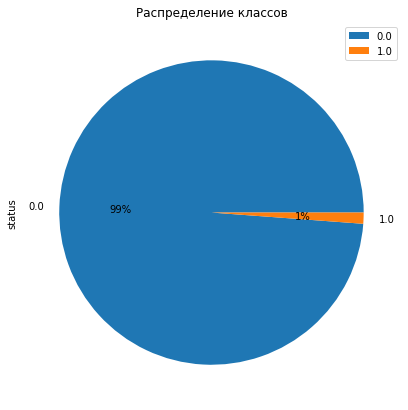

In [ ]:
classes = pd.value_counts(data["status"])

classes.plot(kind='pie',figsize=(7,7),autopct='%0.f%%', legend=True, title ="Распределение классов") 

plt.show()

In [ ]:
x = data.mark_region.values.reshape(-1,1)

In [ ]:
# разделение на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, data['status'], test_size=0.3, random_state=25)          

In [ ]:
# нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Логистическая регрессия

In [ ]:
model = LogisticRegression(class_weight={0: 0.01,1: 0.99})

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.01, 1: 0.99})

In [ ]:
train_preds = model.predict_proba(X_train)[:,1]

test_preds = model.predict_proba(X_test)[:, 1] 

In [ ]:
pd.DataFrame(model.predict_proba(X_test))

,0,1
0,0.994761,0.005239
1,0.964466,0.035534
2,0.188865,0.811135
3,0.985998,0.014002
4,0.728864,0.271136
...,...,...
3431,0.233681,0.766319
3432,0.384890,0.615110
3433,0.989450,0.010550
3434,0.994761,0.005239


In [ ]:
print('result on test: {}'.format(roc_auc_score(y_test, test_preds)))

result on test: 0.972330173613253


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


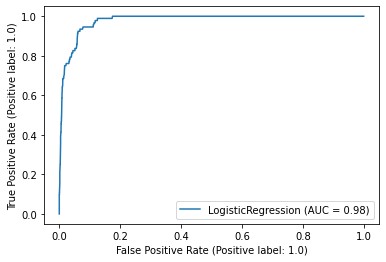

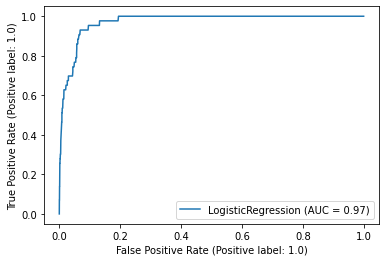

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_train, y_train)

plot_roc_curve(model,X_test, y_test)

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      3393
         1.0       0.11      0.93      0.20        43

    accuracy                           0.91      3436
   macro avg       0.56      0.92      0.58      3436
weighted avg       0.99      0.91      0.94      3436



Предсказание

In [ ]:
data = [list(range(101))]
columns=['mark']
# data = list(range(86))
df = pd.DataFrame(data, columns)

In [ ]:
df_T = df.T

In [ ]:
x_df = df.values.reshape(-1,1)

In [ ]:
scaler = StandardScaler()
x_df_s = scaler.fit_transform(x_df)

In [ ]:
forecast = pd.DataFrame(model.predict_proba(x_df_s))

In [ ]:
x_plt = forecast.index.tolist()

In [ ]:
y_plt = forecast[1].tolist()

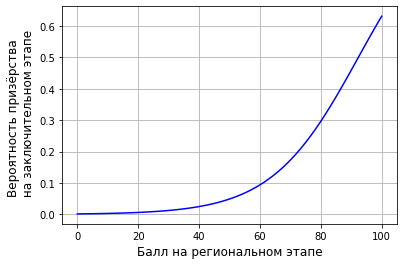

In [ ]:
plt.plot(x_plt, y_plt, 'b')
plt.xlabel('Балл на региональном этапе', fontsize = 12)
plt.ylabel('Вероятность призёрства \n на заключительном этапе', fontsize = 12)
plt.grid()
plt.show()